# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [44]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

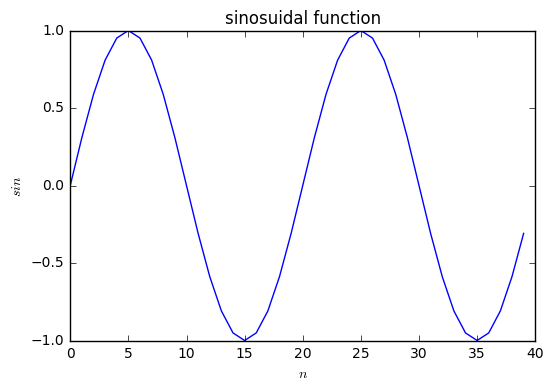

In [47]:
x_t = np.arange(0,2,1/20)
y_t = np.sin(2*np.pi*x_t)

plt.plot(y_t)
plt.xlabel(r'$n$')
plt.ylabel(r'$sin$')
plt.title('sinosuidal function')

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

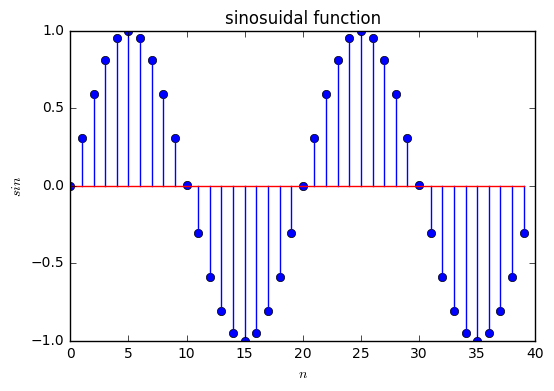

In [48]:
plt.stem(y_t)
plt.xlabel(r'$n$')
plt.ylabel(r'$sin$')
plt.title('sinosuidal function')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

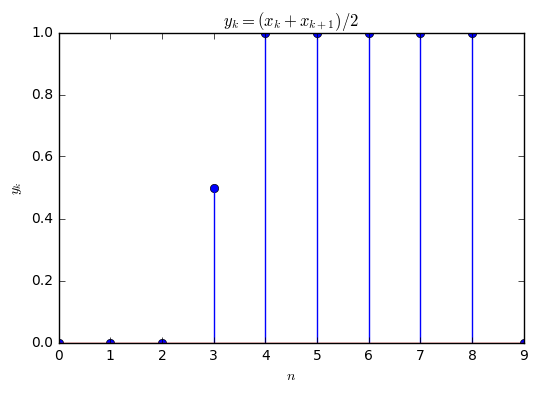

In [49]:
def step(n = 0, N = 20):
    if n > N - 1:
        raise ValueError('n should be inferiror to N - 1')
    
    #Create an array for the function
    s = np.zeros((N, ))
    #Place the step starting at n
    s[n:N] = 1
    return s

N = 10
k = 4
x = step(k, N)
y_k = np.zeros((N, ))
for i in range(0, N-1):
    y_k[i] = (x[i] + x[i+1])/2

plt.stem(y_k)
plt.xlabel(r'$n$')
plt.ylabel(r'$y_k$')
plt.title('$y_k=(x_k+x_{k+1})/2$')

**1.2** Propose a modification to obtain a causal version


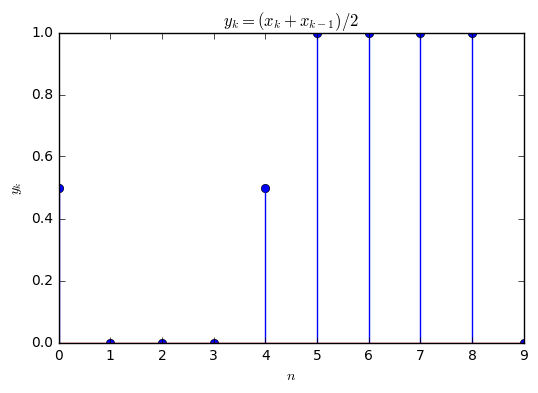

In [50]:
y_k1 = np.zeros((N, ))
for i in range(0, N-1):
    y_k1[i] = (x[i] + x[i-1])/2
    
plt.stem(y_k1)
plt.xlabel(r'$n$')
plt.ylabel(r'$y_k$')
plt.title('$y_k=(x_k+x_{k-1})/2$')

Comments on your observations

comments :-
The was anit-causal earlier

Take the past value instead of the future value

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?

Answers :

The system is BIBO stable.


In [52]:
def prim(f, k):
    N = 20
    
    if k > N - 1:
        raise ValueError('k should be inferiror to N - 1')

    #Create an array for the function
    s = np.zeros((N, ))
    #create the accumulator
    for i in range(0,k):
        s[i] = s[i] + f[i] + s[i-1]
    return s


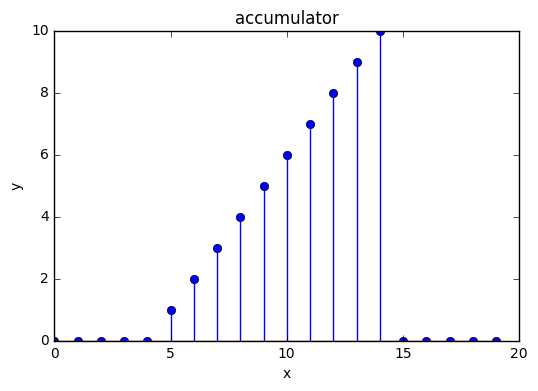

In [53]:
k = 5
f = step(k)
y = prim(f,15)

#plot the function
plt.stem(y)
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title('accumulator')

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

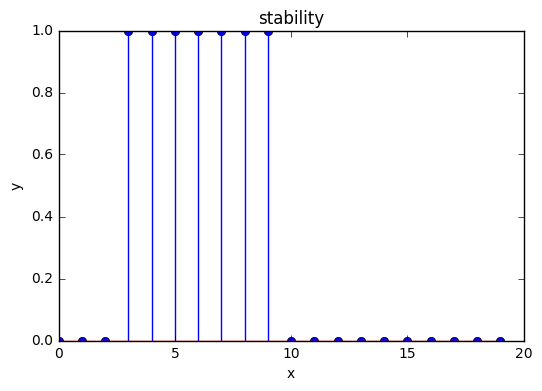

In [27]:
def dirac(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be inferiror to N - 1')
        
    #create an array for the function
    s = np.zeros((N, ))
    #Place the dirac
    s[n] = 1
    return s

f1 = dirac(n=3)
y_d = prim(f1, 10)

plt.stem(y_d)
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title('impulse response')

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

Answers :

1. This system is BIBO stable

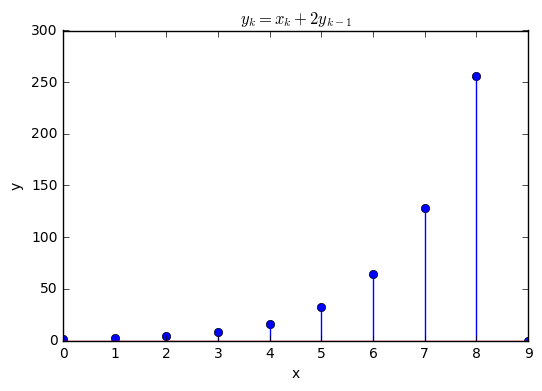

In [55]:
N = 10
xk = dirac(n=0)
yk = np.zeros((N, ))
yk[0] = xk[0]
for i in range(1,N-1):
    yk[i] = xk[i] + 2*yk[i-1]

plt.stem(yk)
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title('$y_k=x_k+2y_{k-1}$')

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

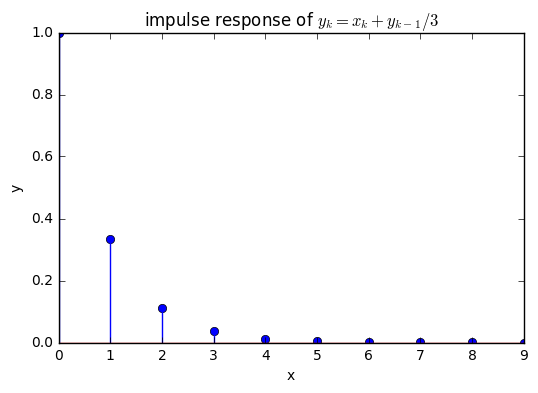

In [57]:
N = 10
yk1 = np.zeros((N, ))
yk1[0] = xk[0]
for i in range(1,N-1):
    yk1[i] = xk[i] + (yk1[i-1])/3

plt.stem(yk1)
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title('impulse response of $y_k=x_k+y_{k-1}/3$')

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


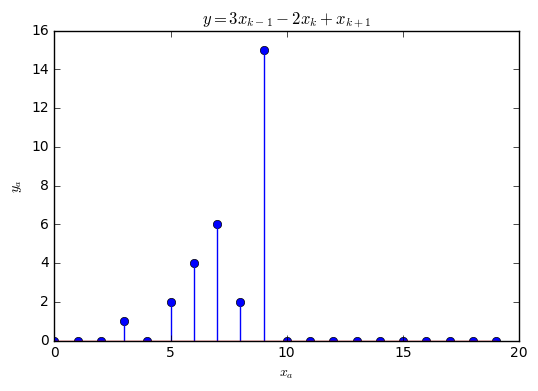

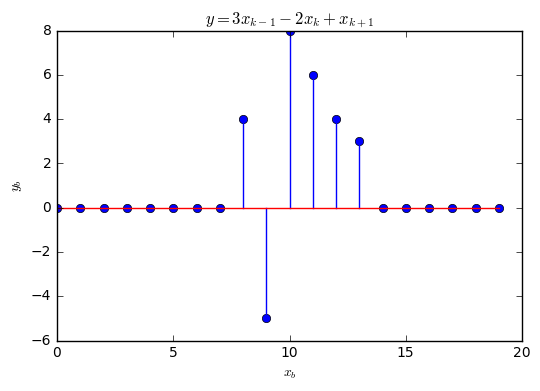

In [59]:
x_a = np.array([0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0])
x_b = np.array([0,0,0,0,0,0,0,0,0,4,3,2,1,0,0,0,0,0,0])
y_a = np.zeros((20,))
y_b = np.zeros((20,))
y_a[0] = y_b[0] = 0

for i in range (1,18):
    y_a[i] = 3*x_a[i-1] - 2*x_a[i] + x_a[i+1]
    y_b[i] = 3*x_b[i-1] - 2*x_b[i] + x_b[i+1]

plt.figure(1)    
plt.stem(y_a)
plt.xlabel(r'$x_a$')
plt.ylabel(r'$y_a$')
plt.title('$y=3x_{k-1}-2x_k+x_{k+1}$')

plt.figure(2)
plt.stem(y_b)
plt.xlabel(r'$x_b$')
plt.ylabel(r'$y_b$')
plt.title('$y=3x_{k-1}-2x_k+x_{k+1}$')

**3.2** Prove the system defined by the previous equation is linear (and invariant).

Comments :-

1. Any system can be verified for linearity by setting the input as a linear combination of two signals. We can use the above defined input signals as input by checking if a$x_a$ + b$x_b$ = a$y_a$ + b$y_b$ is true.

In [40]:
a = 2.0
b = 1.5
y_comb = np.zeros((20,))
x_1 = np.zeros((20,))
y_1 = np.zeros((20,))
y_comb[0] = 0

#Add both the input signals
x_1 = a*x_a + b*x_b

#Find the response for the combined input
for i in range (1,18):
    y_comb[i] = 3*x_1[i-1] - 2*x_1[i] + x_1[i+1]

#Compute the sum of the individual responses
y_1 = a*y_a + b*y_b

#verify if the system is Linear or not.
if np.all(y_comb == y_1):
    print ("Linear")
else:
    print ("Non Linear")
    


Linear


**3.3** Propose a nonlinear/noninvariant system.

1. y = 2$x_k ^2$ +  $x_{k+1}$ could be an example for nonlinear systems

Non Linear


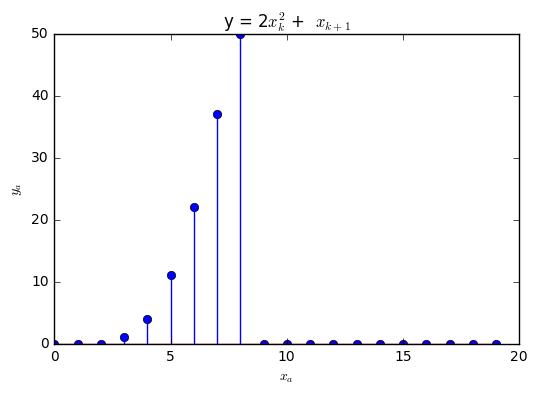

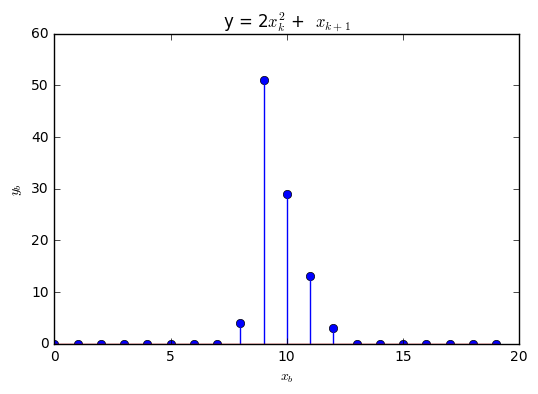

In [60]:
y_a1 = np.zeros((20,))
y_b1 = np.zeros((20,))
y_a1[0] = y_b1[0] = 0

#Define the system
for i in range (1,18):
    y_a1[i] = 2*x_a[i]*x_a[i] + x_a[i+1]
    y_b1[i] = 3*x_b[i]*x_b[i] + x_b[i+1]

plt.figure(1)    
plt.stem(y_a1)
plt.xlabel(r'$x_a$')
plt.ylabel(r'$y_a$')
plt.title('y = 2$x_k ^2$ +  $x_{k+1}$')

plt.figure(2)
plt.stem(y_b1)
plt.xlabel(r'$x_b$')
plt.ylabel(r'$y_b$')
plt.title('y = 2$x_k ^2$ +  $x_{k+1}$')

#Linearity could be checked in the same as above
y_comb = np.zeros((20,))
y_comb[0] = 0
y_11 = np.zeros((20,))

#Find the response for the combined input
for i in range (1,18):
    y_comb[i] = 2*x_1[i]*x_1[i] + x_1[i+1]

#Compute the sum of the individual responses
y_11 = a*y_a1 + b*y_b1

#verify if the system is Linear or not.
if np.all(y_comb == y_1):
    print ("Linear")
else:
    print ("Non Linear")